In [1]:
import json
import os
import pandas as pd
import networkx as nx
import numpy as np
import datgan
import matplotlib.pyplot as plt

In [9]:
DatGan_path = '/home/s212574/snap/snapd-desktop-integration/83/Documents/Thesis/MSc_PopSyn/Sigga_Luis/Data/'
os.chdir(DatGan_path)

# folder name
v1_name = 'DatGan v1'
v1_folder_name = 'FolderName'
v1_csv_name = 'DatGan/'

# Load the data dtypes dictionary 
os.chdir(DatGan_path + v1_folder_name)
file_path = 'df_dtypes.json'
with open(file_path, 'r') as file:
    v1_loaded_df_types = json.load(file)

os.chdir(DatGan_path + v1_folder_name)
v1_train_set = pd.read_csv('train_newCat.csv', sep=',',dtype=v1_loaded_df_types)
v1_train_set.drop(v1_train_set.columns[v1_train_set.columns.str.contains('unnamed', case=False)], axis=1, inplace=True)

v1_test_set = pd.read_csv('test_newCat.csv', sep=',', dtype=v1_loaded_df_types)
v1_test_set.drop(v1_test_set.columns[v1_test_set.columns.str.contains('unnamed', case=False)], axis=1, inplace=True)


# Drop Income Outliers
a = v1_train_set[['IncRespondent2000','IncFamily2000']].loc[(v1_train_set.IncRespondent2000 >= 10000) | (v1_train_set.IncFamily2000 >= 10000) | (v1_train_set.IncFamily2000 < v1_train_set.IncRespondent2000)].sort_values(by=['IncRespondent2000'], ascending=False)
v1_train_set.drop(index=a.index.tolist(), inplace=True)

b = v1_test_set[['IncRespondent2000','IncFamily2000']].loc[(v1_train_set.IncRespondent2000 >= 10000) | (v1_test_set.IncFamily2000 >= 10000) |(v1_test_set.IncFamily2000 < v1_test_set.IncRespondent2000)].sort_values(by=['IncRespondent2000'], ascending=False)
v1_test_set.drop(index=b.index.tolist(), inplace=True)

# Check the shapes of your sets
print("Training set shape:", v1_train_set.shape)
print("Testing set shape:", v1_test_set.shape)


os.chdir(DatGan_path + v1_folder_name + v1_csv_name)
v1_samples = pd.read_csv('DatGan_synthetic.csv',
                         sep=',', dtype=v1_loaded_df_types)
# samples = pd.read_csv('synthetic.csv', sep=',')
v1_samples.drop(v1_samples.columns[v1_samples.columns.str.contains(
    'unnamed', case=False)], axis=1, inplace=True)

Training set shape: (97873, 38)
Testing set shape: (41718, 38)


In [10]:
DatGan_path = '/home/s212574/snap/snapd-desktop-integration/83/Documents/Thesis/MSc_PopSyn/Sigga_Luis/Data/'
os.chdir(DatGan_path)

# folder name
v2_name = 'DatGan v2'
v2_folder_name = 'FodlerName'
v2_csv_name = 'DatGan/'

# Load the data dtypes dictionary
os.chdir(DatGan_path + v2_folder_name)
file_path = 'df_dtypes.json'
with open(file_path, 'r') as file:
    v2_loaded_df_types = json.load(file)

os.chdir(DatGan_path + v2_folder_name)
v2_train_set = pd.read_csv(
    'train_newCat.csv', sep=',', dtype=v2_loaded_df_types)
v2_train_set.drop(v2_train_set.columns[v2_train_set.columns.str.contains(
    'unnamed', case=False)], axis=1, inplace=True)

v2_test_set = pd.read_csv('test_newCat.csv', sep=',', dtype=v2_loaded_df_types)
v2_test_set.drop(v2_test_set.columns[v2_test_set.columns.str.contains(
    'unnamed', case=False)], axis=1, inplace=True)


# Drop Income Outliers
a = v2_train_set[['IncRespondent2000', 'IncFamily2000']].loc[(v2_train_set.IncRespondent2000 >= 10000) | (v2_train_set.IncFamily2000 >= 10000) | (
    v2_train_set.IncFamily2000 < v2_train_set.IncRespondent2000)].sort_values(by=['IncRespondent2000'], ascending=False)
v2_train_set.drop(index=a.index.tolist(), inplace=True)

b = v2_test_set[['IncRespondent2000', 'IncFamily2000']].loc[(v2_train_set.IncRespondent2000 >= 10000) | (v2_test_set.IncFamily2000 >= 10000) | (
    v2_test_set.IncFamily2000 < v2_test_set.IncRespondent2000)].sort_values(by=['IncRespondent2000'], ascending=False)
v2_test_set.drop(index=b.index.tolist(), inplace=True)

# Check the shapes of your sets
print("Training set shape:", v2_train_set.shape)
print("Testing set shape:", v2_test_set.shape)


os.chdir(DatGan_path + v2_folder_name + v2_csv_name)
v2_samples = pd.read_csv('DatGan_synthetic.csv', sep=',', dtype=v2_loaded_df_types)
# v2_samples = pd.read_csv('synthetic.csv', sep=',')
v2_samples.drop(v2_samples.columns[v2_samples.columns.str.contains(
    'unnamed', case=False)], axis=1, inplace=True)

Training set shape: (97873, 38)
Testing set shape: (41718, 38)


In [ ]:
def plot_histograms(dataframes, column_names, dataframe_names):
    fig, axs = plt.subplots(len(column_names), 3, figsize=(20, 5))

    for i, column_name in enumerate(column_names):
        for j, dataframe in enumerate(dataframes):
            sorted_data = np.sort(dataframes[j][column_name])
            nbins = dataframes[j][column_name].nunique()
            axs[j].hist(sorted_data, density=True, bins=nbins, alpha=0.5)
            axs[j].set_title(dataframe_names[j])
            axs[j].set_ylabel('Percentage')

    plt.show()
# Example usage:
column_names = ['Education']
dataframes = [v1_train_set, v1_test_set, v1_samples]
dataframe_names = ['Train', 'Test', 'Synthetic']
plot_histograms(dataframes, column_names,dataframe_names)

In [ ]:
column_name = 'Gender'

# Calculate value counts for each dataset
train_counts = train_set[column_name].value_counts(normalize=True)
test_counts = test_set[column_name].value_counts(normalize=True)
samples_counts = samples[column_name].value_counts(normalize=True)

# Get unique categories
categories = train_counts.index.tolist()

# Define the width of each bar
bar_width = 0.3

# Create an array of x-coordinates for each category
x_train = np.arange(len(categories))
x_test = x_train + bar_width * 1.1  # Slightly offset the 'Test' bars
x_samples = x_train + bar_width * 2.2  # Slightly offset the 'Synthetic' bars

# Create a bar plot for each dataset with offset bars
plt.figure(figsize=(10, 6))

plt.bar(x_train, train_counts, alpha=0.5, label='Train', width=bar_width)
plt.bar(x_test, test_counts, alpha=0.5, label='Test', width=bar_width)
plt.bar(x_samples, samples_counts, alpha=0.5,
        label='Synthetic', width=bar_width)

# Set x-axis ticks and labels
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Education Level Distribution')
plt.xticks((x_train + x_samples) / 2, categories, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [11]:
def plot_comparison(v1_train_set, v1_test_set, v1_samples, v2_train_set, v2_test_set, v2_samples, column_name, Density=False):    

    def calculate_counts(dataset):
        if Density:
            return dataset[column_name].value_counts(normalize=True)
        else:
            return dataset[column_name].value_counts()


    def add_missing_values_with_zero_counts(column_name, *args):
        all_values = set().union(*(d.keys() for d in args))
        result = []

        for counts in args:
            new_counts = counts.copy()
            for val in all_values:
                if val not in counts:
                    new_counts[val] = 0
            counts_result = pd.Series(new_counts)
            counts_result.name = 'Counts'
            counts_result.index.name = column_name
            result.append(counts_result)

        return result
        
    def sort_values_by_dtype(values):
        try:
            # Try sorting as integers
            sorted_values = sorted(values, key=lambda x: int(x))
        except ValueError:
            try:
                # Try sorting as floats
                sorted_values = sorted(values, key=lambda x: float(x))
            except ValueError:
                # If neither int nor float, sort as strings
                sorted_values = sorted(values)
        return sorted_values

    # Calculate value counts for each dataset - Version 1
    v1_train_counts = calculate_counts(v1_train_set)
    v1_test_counts = calculate_counts(v1_test_set)
    v1_samples_counts = calculate_counts(v1_samples)

    result = add_missing_values_with_zero_counts(column_name, v1_train_counts, v1_test_counts, v1_samples_counts)                            
    v1_train_counts = result[0]
    v1_test_counts = result[1]
    v1_samples_counts = result[2]

    v1_categories = sort_values_by_dtype(result[0].index.tolist())

    # Calculate value counts for each dataset - Version 2
    v2_train_counts = calculate_counts(v2_train_set)
    v2_test_counts = calculate_counts(v2_test_set)
    v2_samples_counts = calculate_counts(v2_samples)

    result = add_missing_values_with_zero_counts(column_name, v2_train_counts, v2_test_counts, v2_samples_counts)
    v2_train_counts = result[0]
    v2_test_counts = result[1]
    v2_samples_counts = result[2]
  
    v2_categories = sort_values_by_dtype(v2_train_counts.index.tolist())


    # Define the width of each bar  
    bar_width = 0.3

    # Create an array of x-coordinates for each category
    v1_x_train = np.arange(len(v1_categories))
    v1_x_test = v1_x_train + bar_width * 1.1  # Slightly offset the 'Test' bars
    v1_x_samples = v1_x_train + bar_width * 2.2  # Slightly offset the 'Synthetic' bars

    # Create an array of x-coordinates for each category
    v2_x_train = np.arange(len(v2_categories))
    v2_x_test = v2_x_train + bar_width * 1.1  # Slightly offset the 'Test' bars
    v2_x_samples = v2_x_train + bar_width * 2.2  # Slightly offset the 'Synthetic' bars



    # Create a figure with subplots for each version
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))  # 2 rows, 2 columns

       # Plotting for Version 1
    axs[0].bar(v1_x_train, v1_train_counts[v1_categories],
                  alpha=0.5, label='Train', width=bar_width)
    axs[0].bar(v1_x_test, v1_test_counts[v1_categories],
                  alpha=0.5, label='Test', width=bar_width)
    axs[0].bar(v1_x_samples, v1_samples_counts[v1_categories],
                  alpha=0.5, label='Synthetic', width=bar_width)
    axs[0].set_xlabel(column_name)
    axs[0].set_ylabel('Density')
    axs[0].set_title(f'{v1_name} - {column_name} Distribution')
    axs[0].set_xticks((v1_x_train + v1_x_samples) / 2)
    axs[0].set_xticklabels(v1_categories, rotation=45)
    axs[0].legend()

    # Plotting for Version 2
    axs[1].bar(v2_x_train, v2_train_counts[v2_categories],
                  alpha=0.5, label='Train', width=bar_width)
    axs[1].bar(v2_x_test, v2_test_counts[v2_categories],
                  alpha=0.5, label='Test', width=bar_width)
    axs[1].bar(v2_x_samples, v2_samples_counts[v2_categories],
                  alpha=0.5, label='Synthetic', width=bar_width)
    axs[1].set_xlabel(column_name)
    axs[1].set_ylabel('Density')
    axs[1].set_title(f'{v2_name} - {column_name} Distribution')
    axs[1].set_xticks((v2_x_train + v2_x_samples) / 2)
    axs[1].set_xticklabels(v2_categories, rotation=45)
    axs[1].legend()

    plt.tight_layout()

    plt.show()

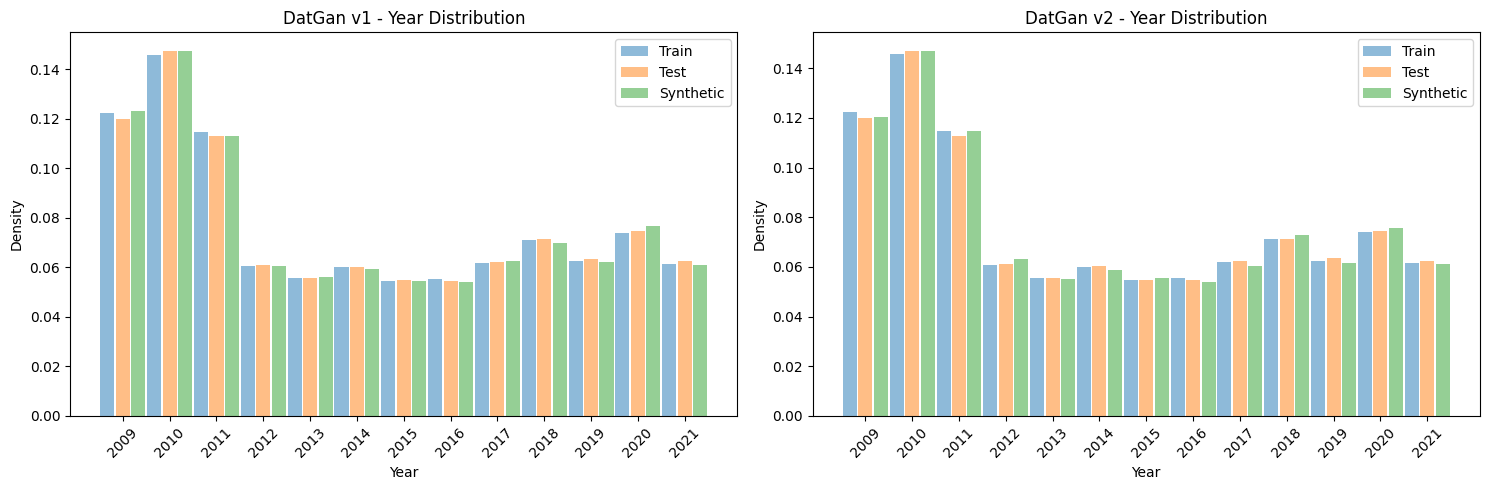

In [12]:

plot_comparison(v1_test_set, v1_train_set, v1_samples, v2_test_set,
                v2_train_set, v2_samples, 'Year', Density=True)


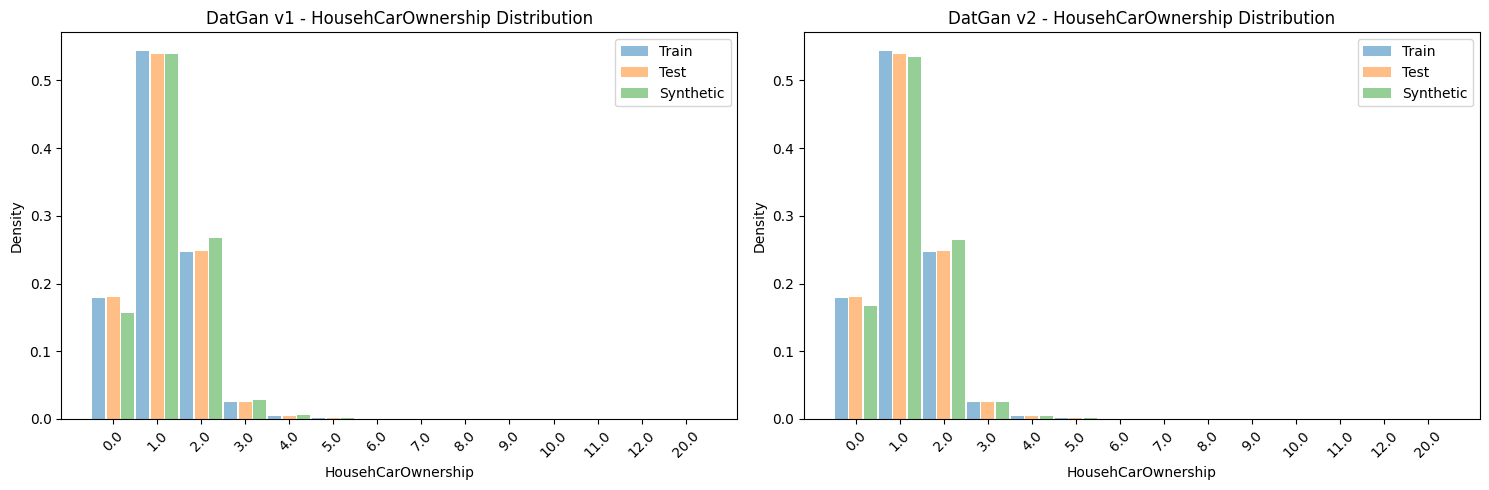

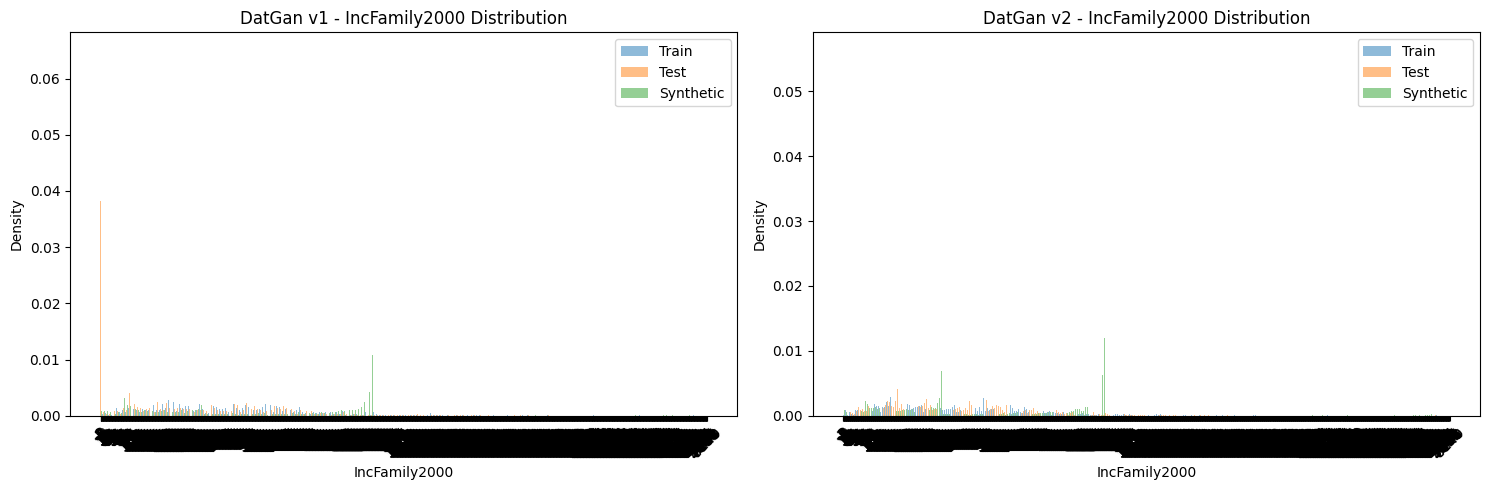

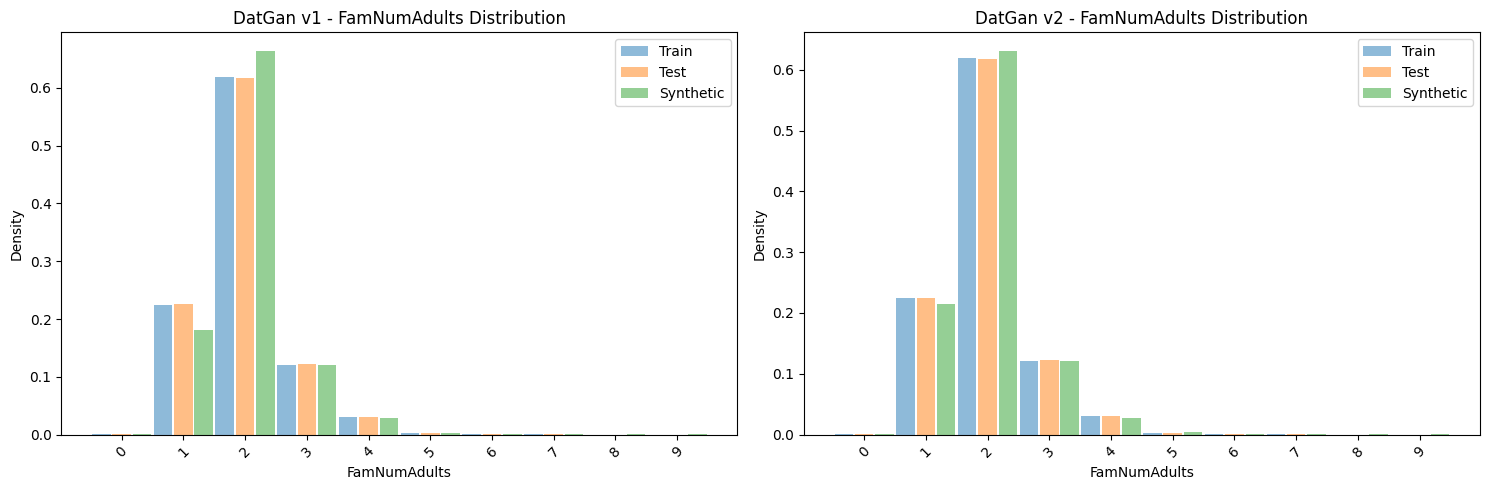

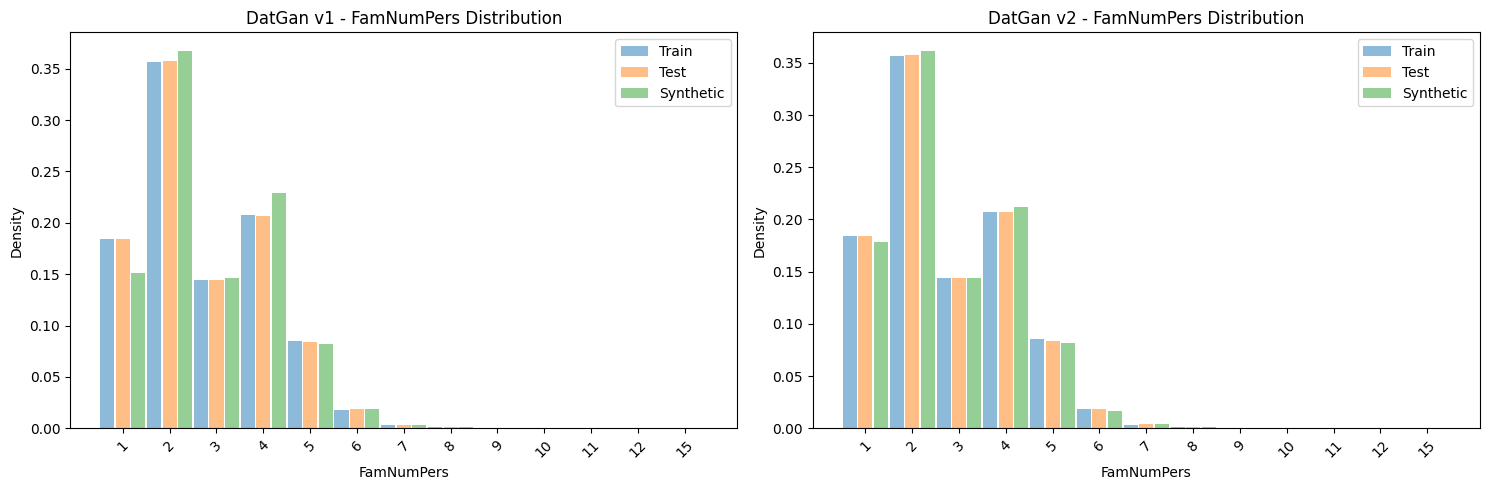

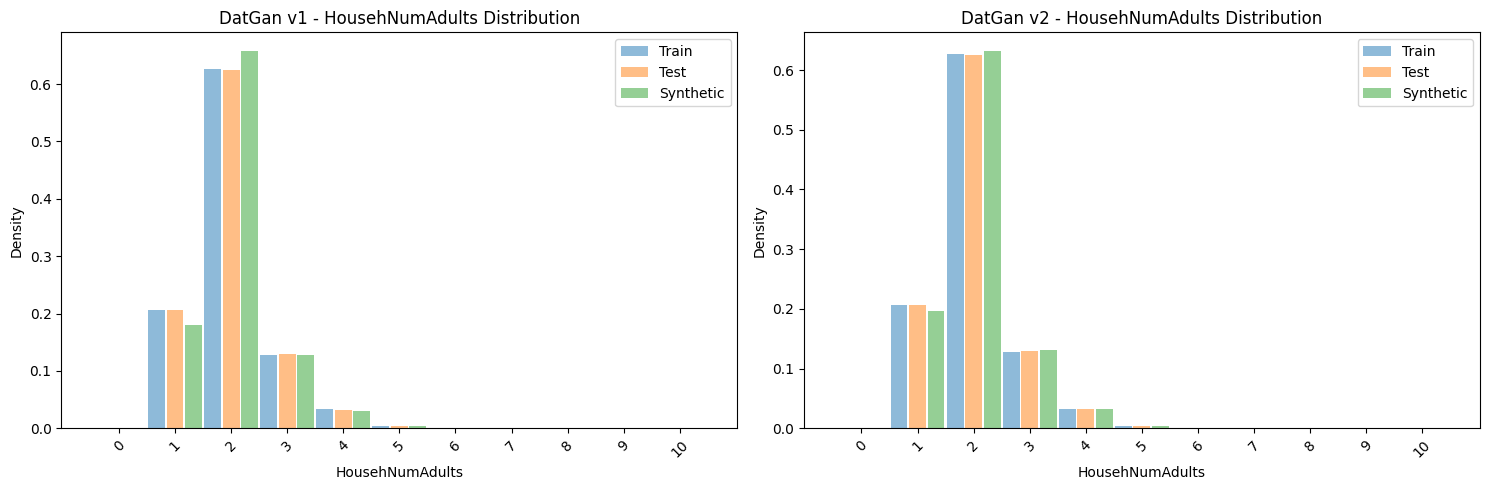

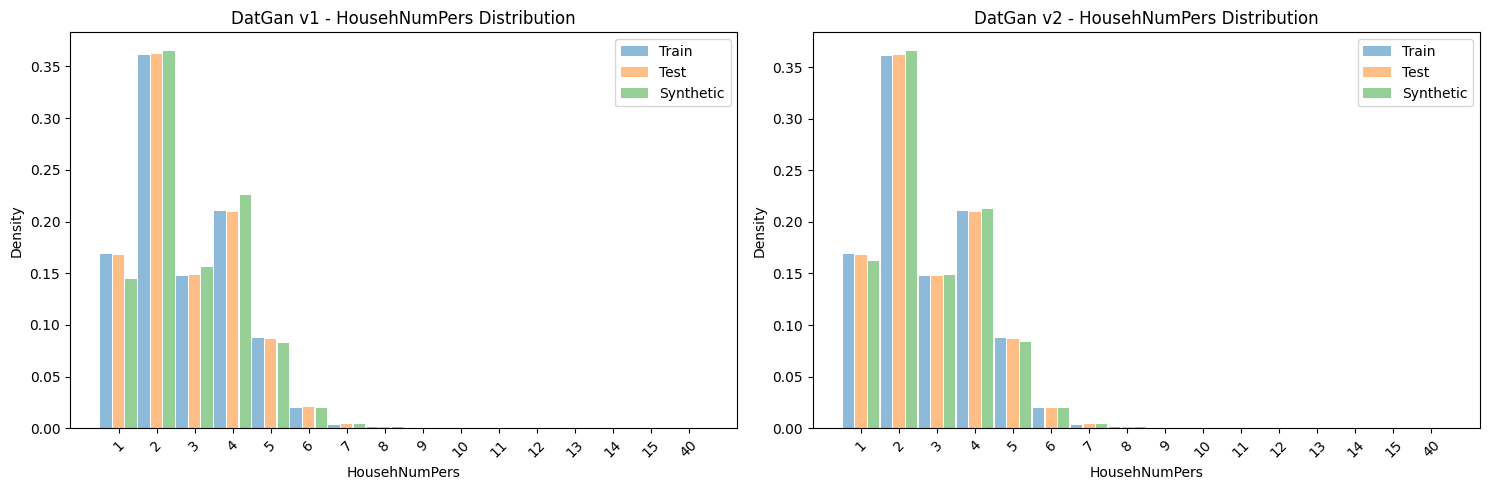

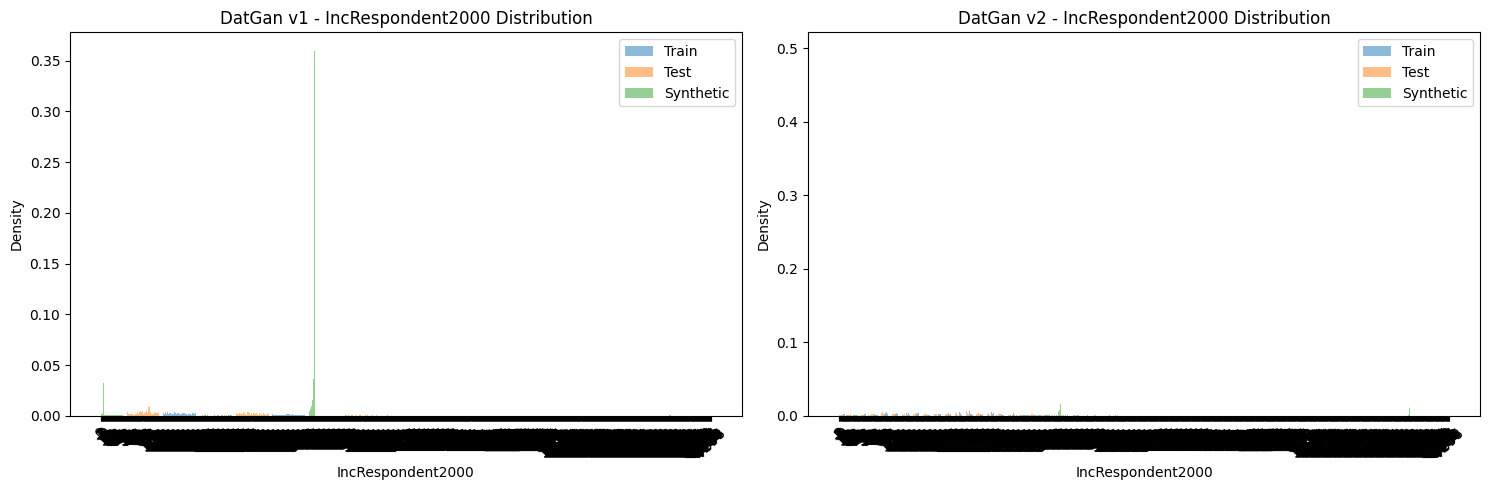

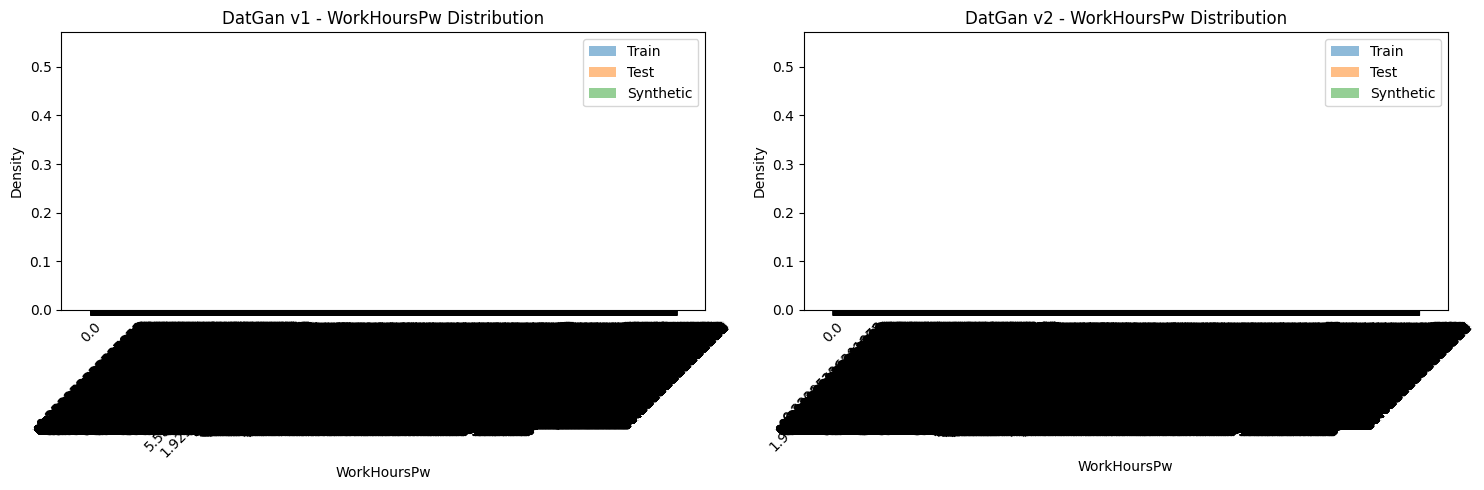

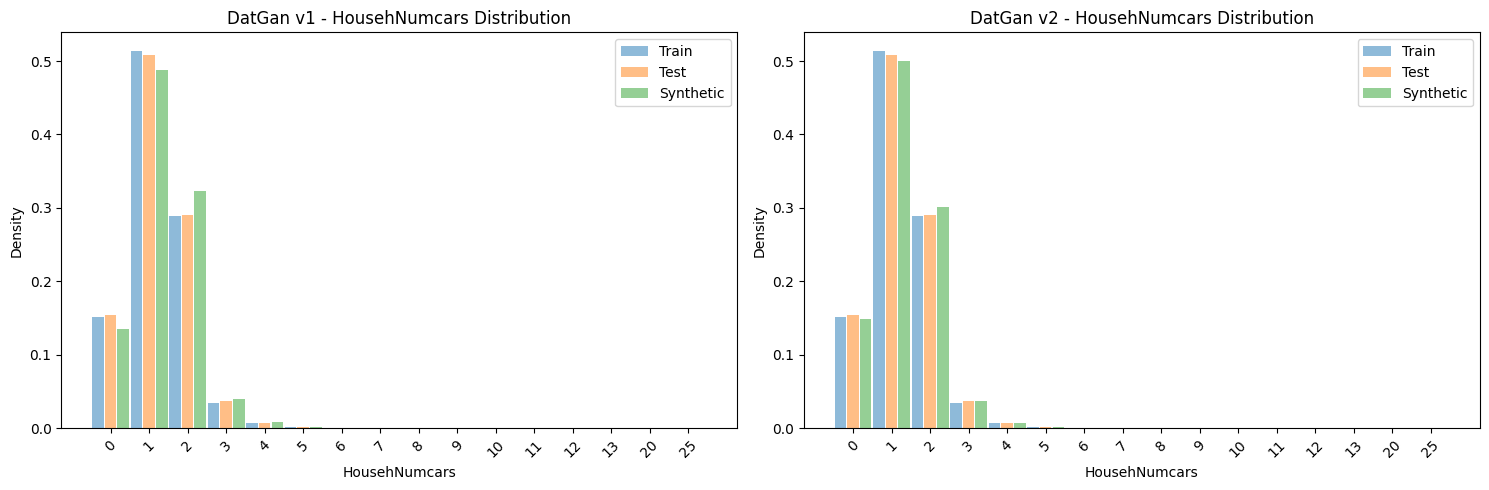

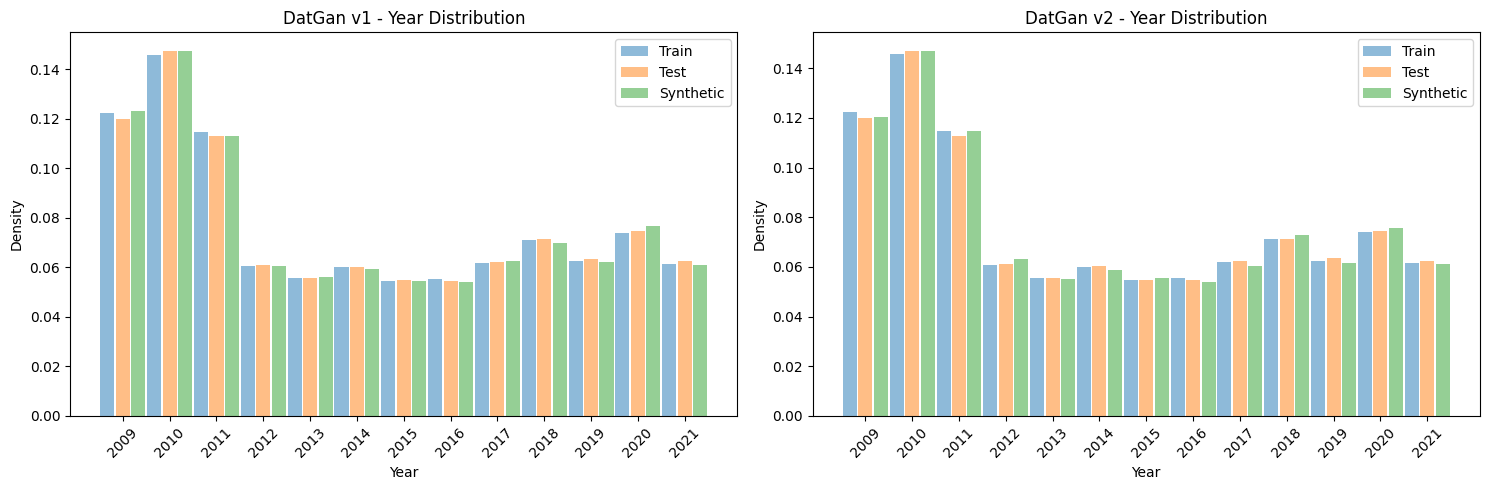

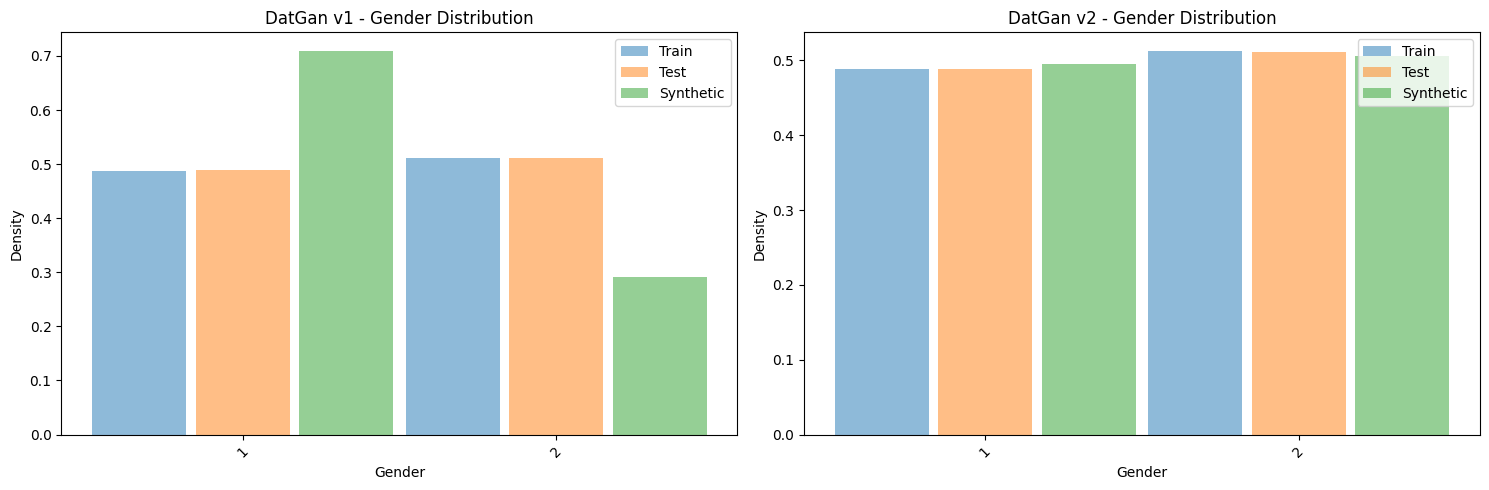

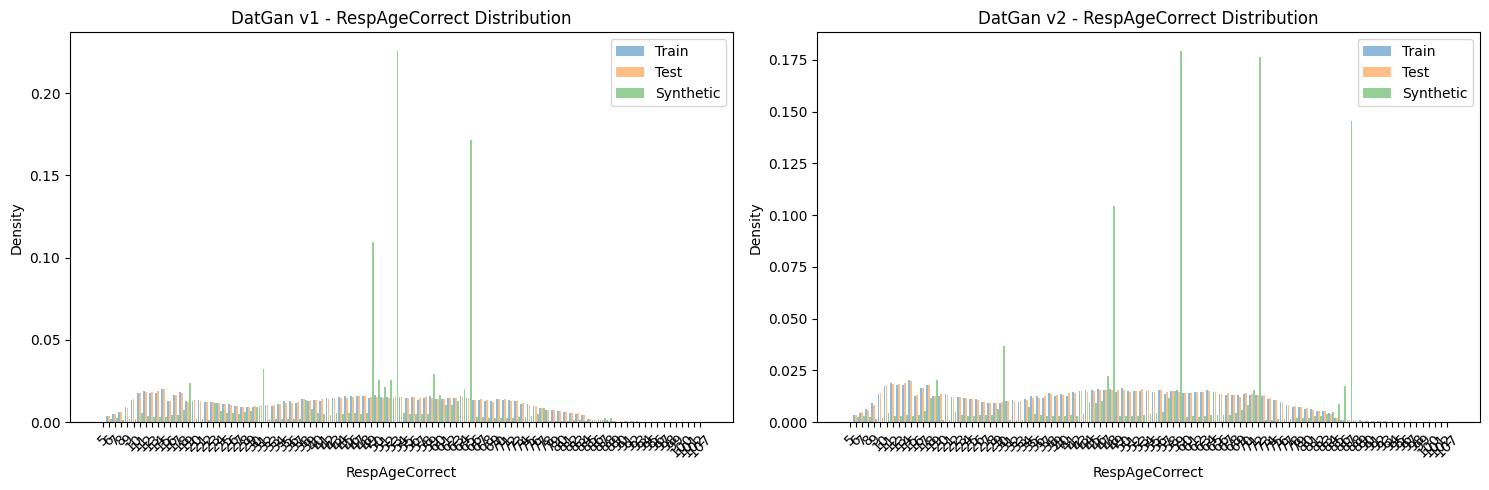

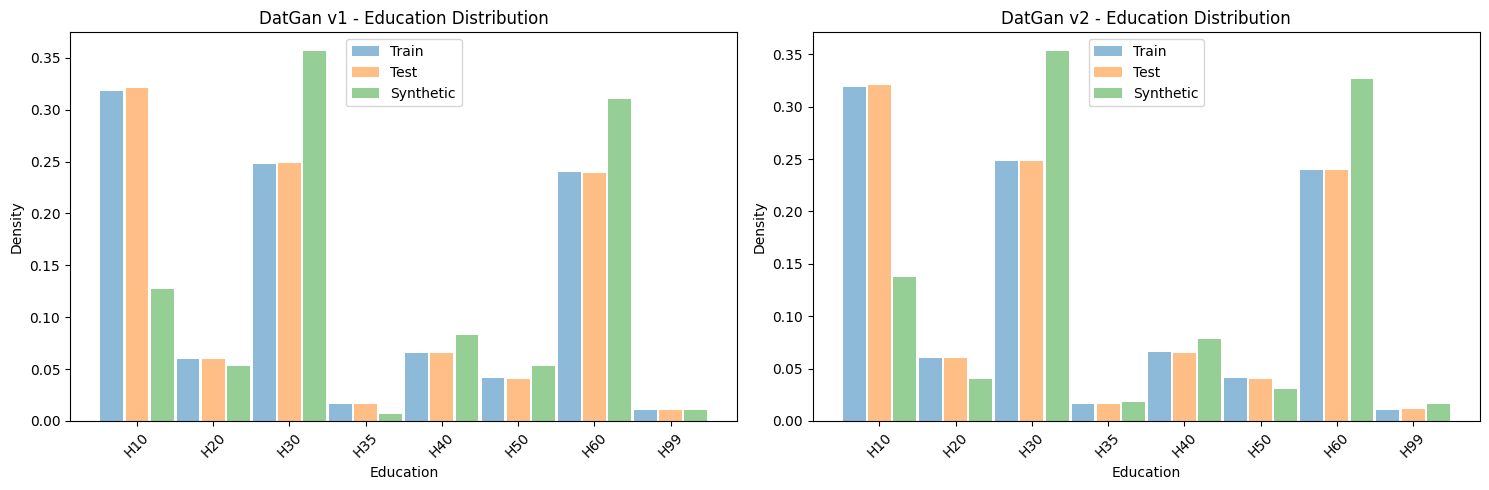

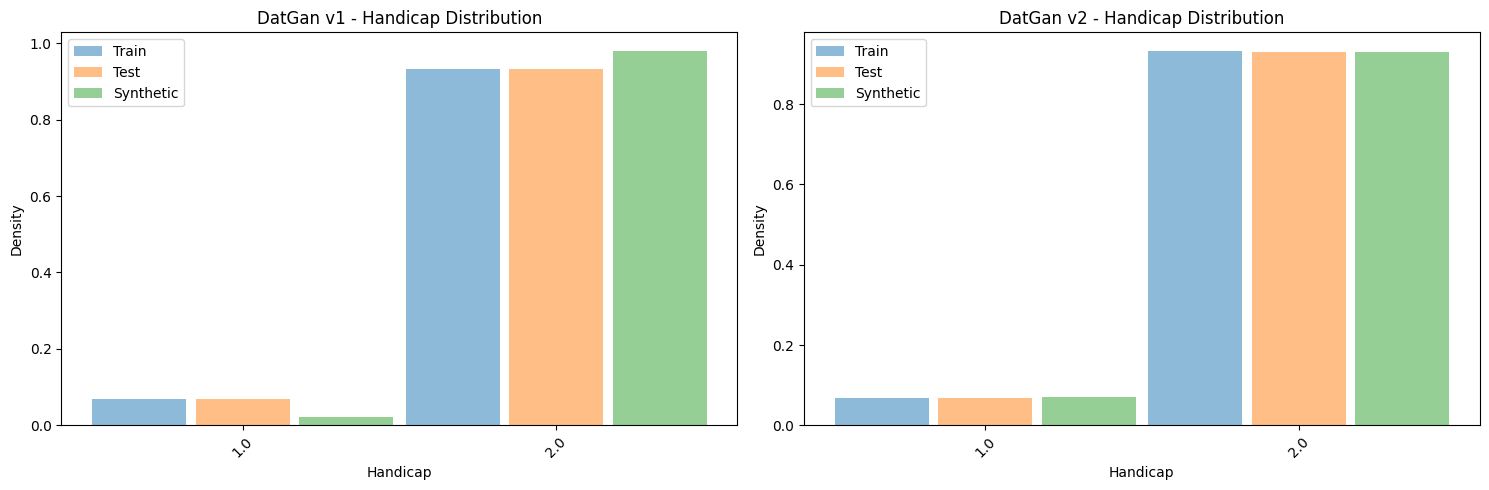

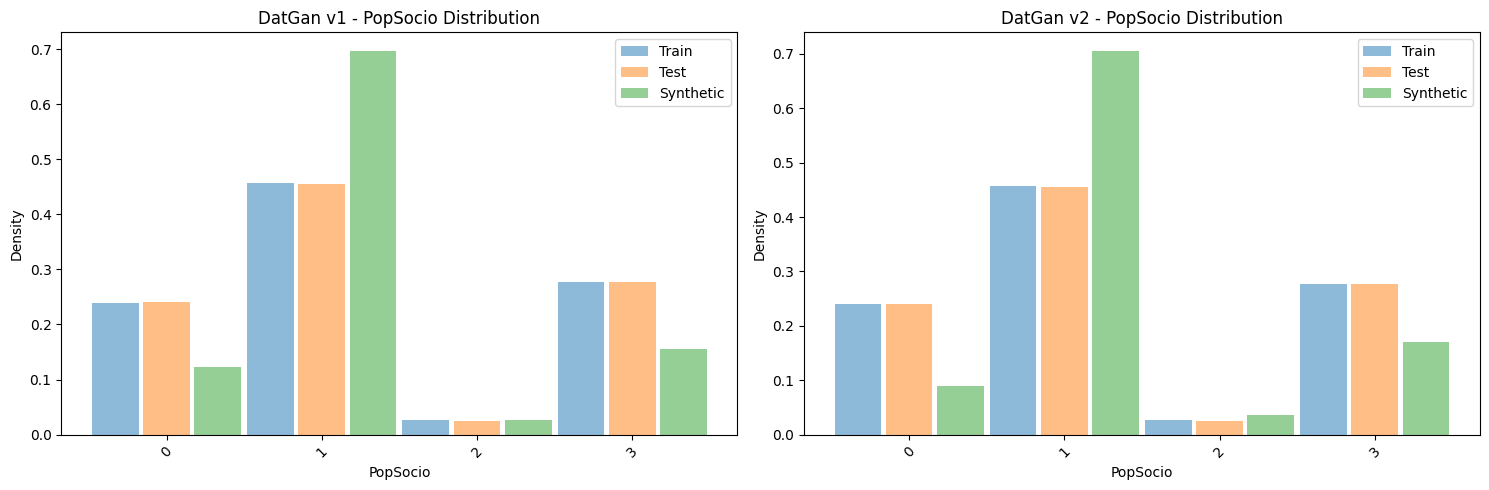

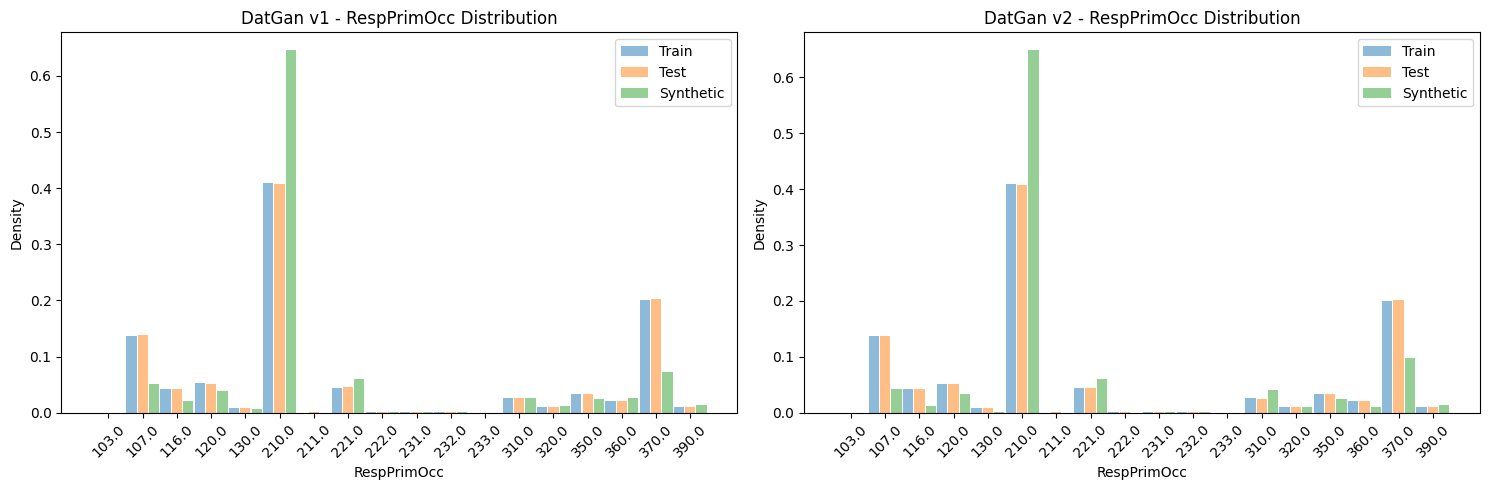

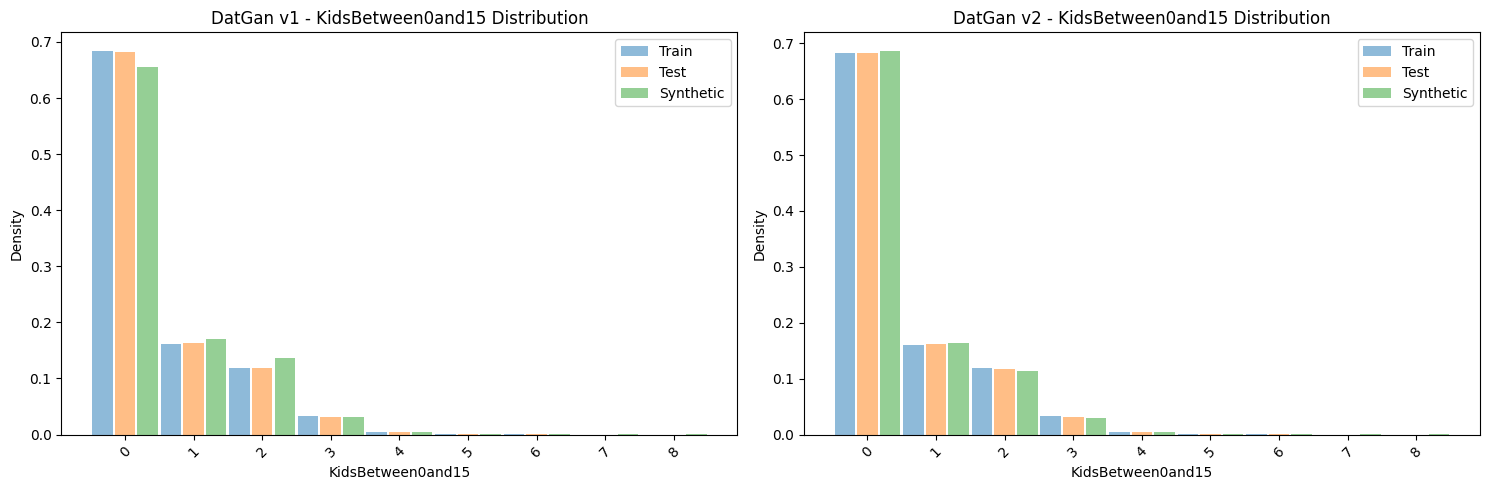

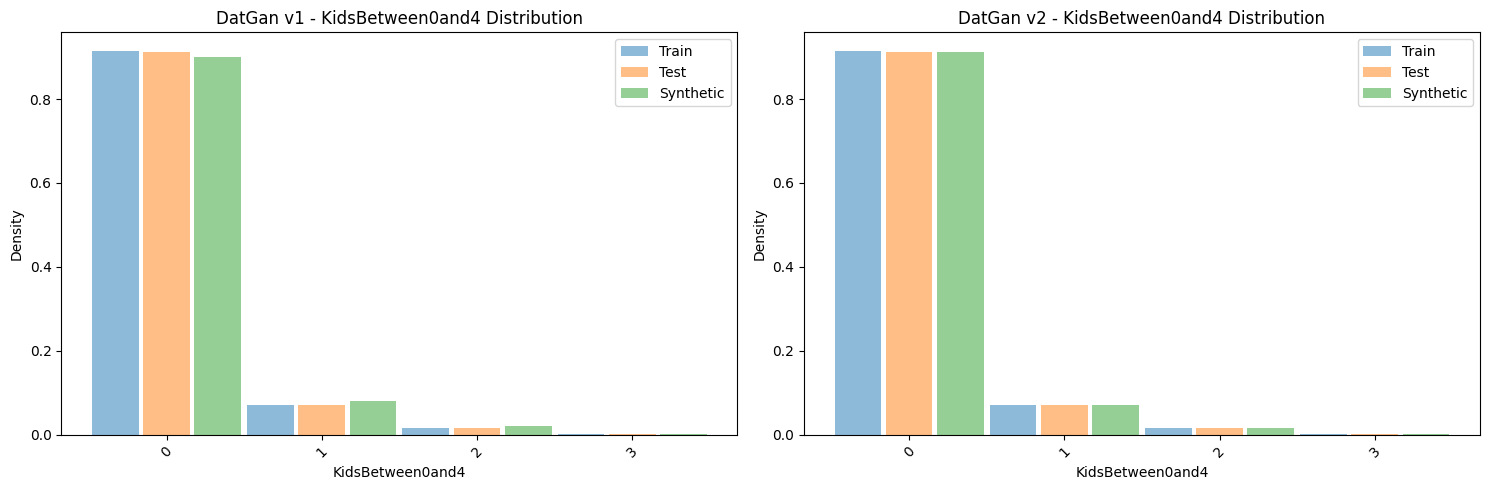

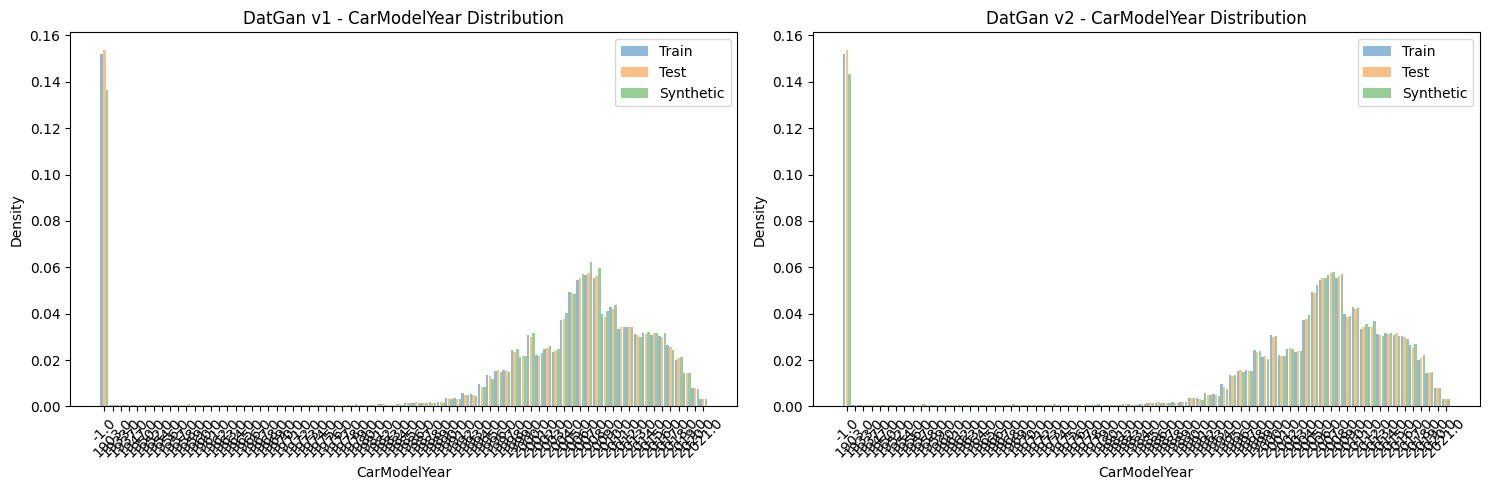

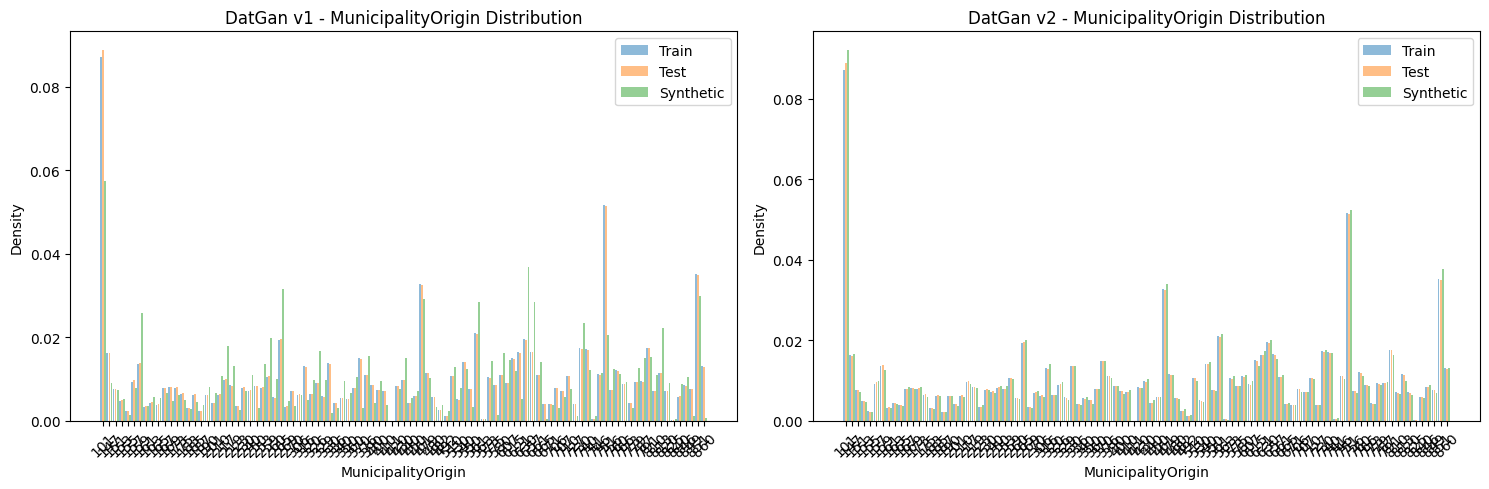

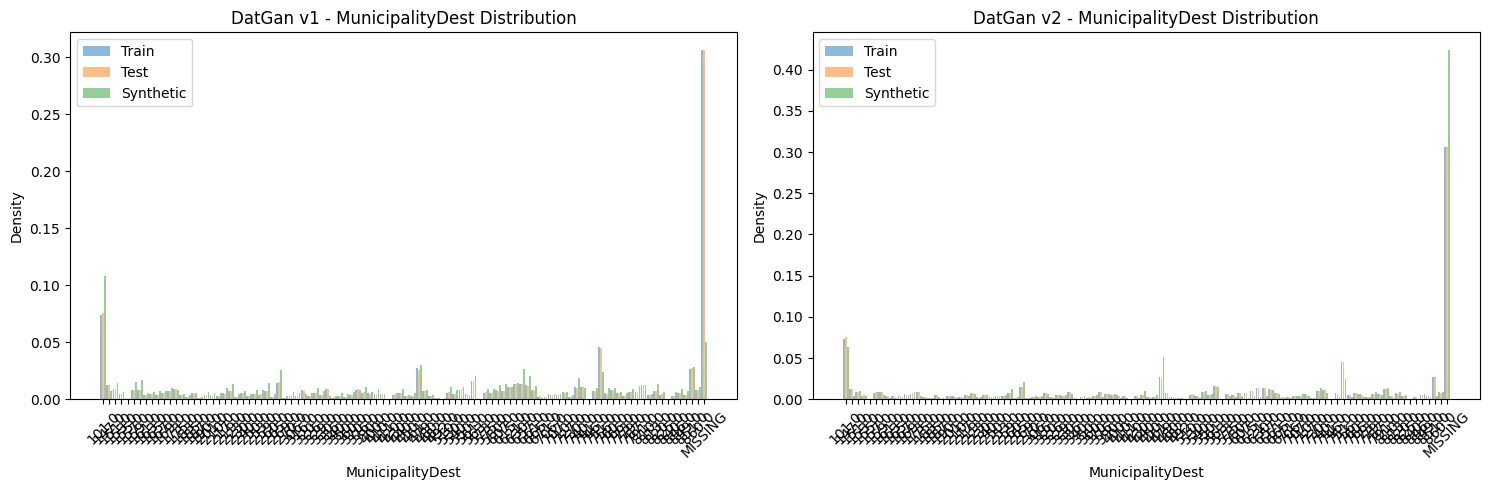

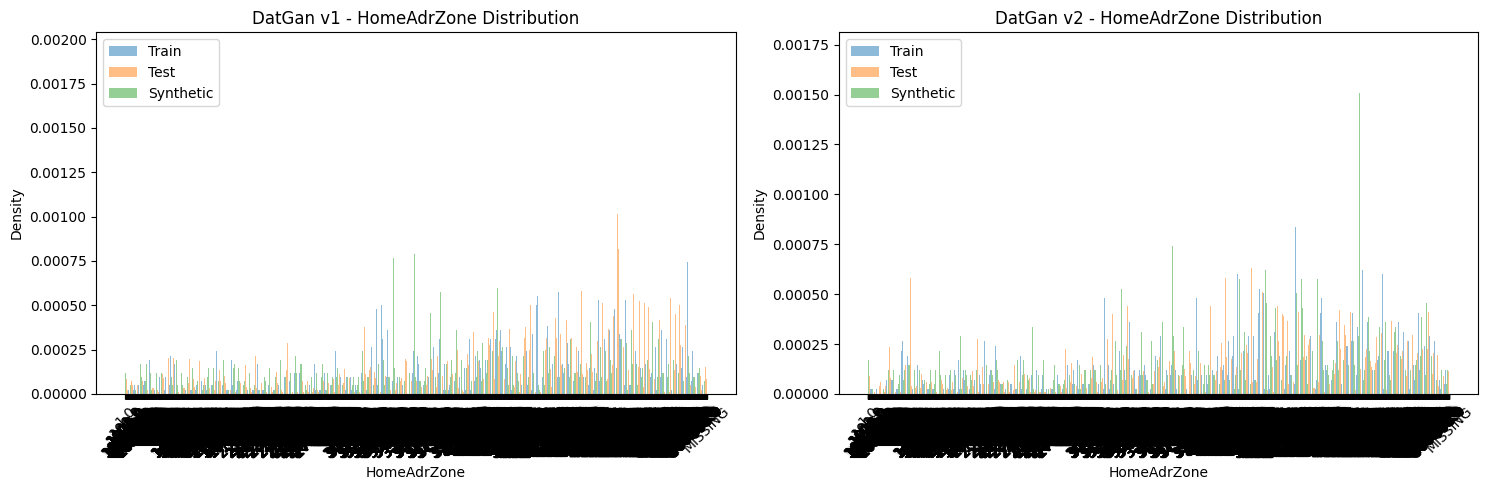

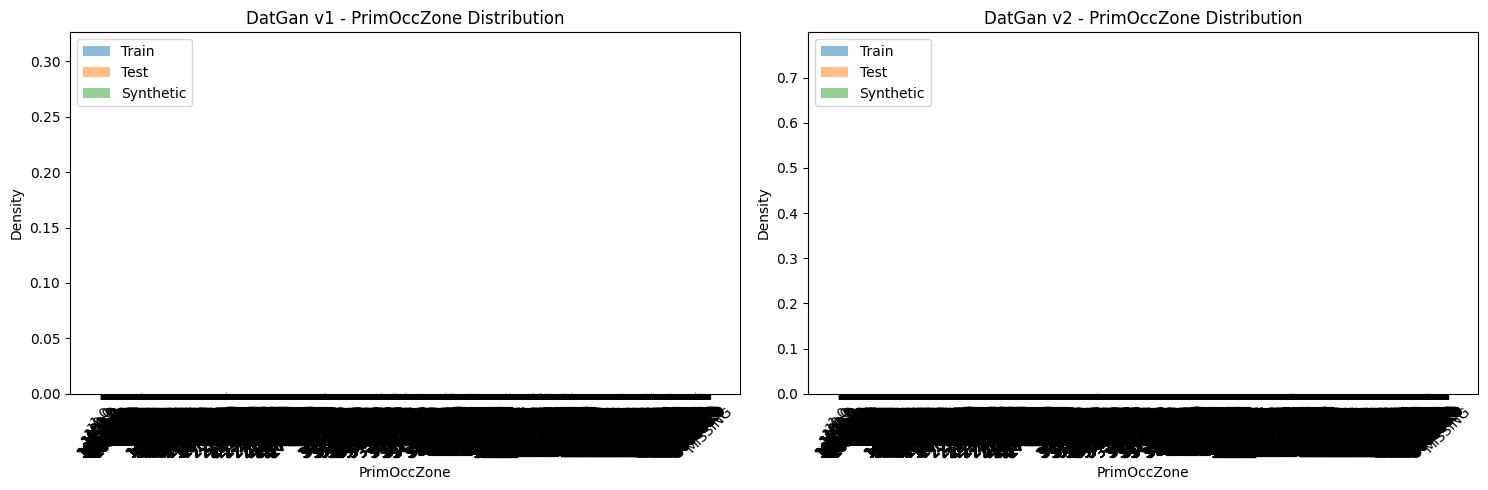

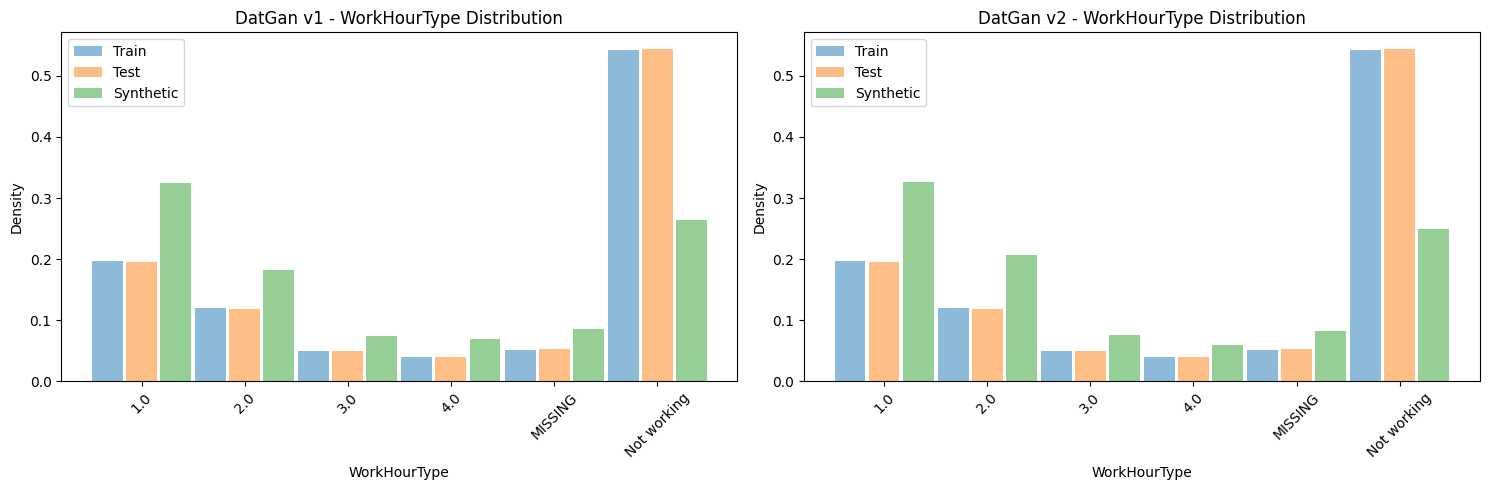

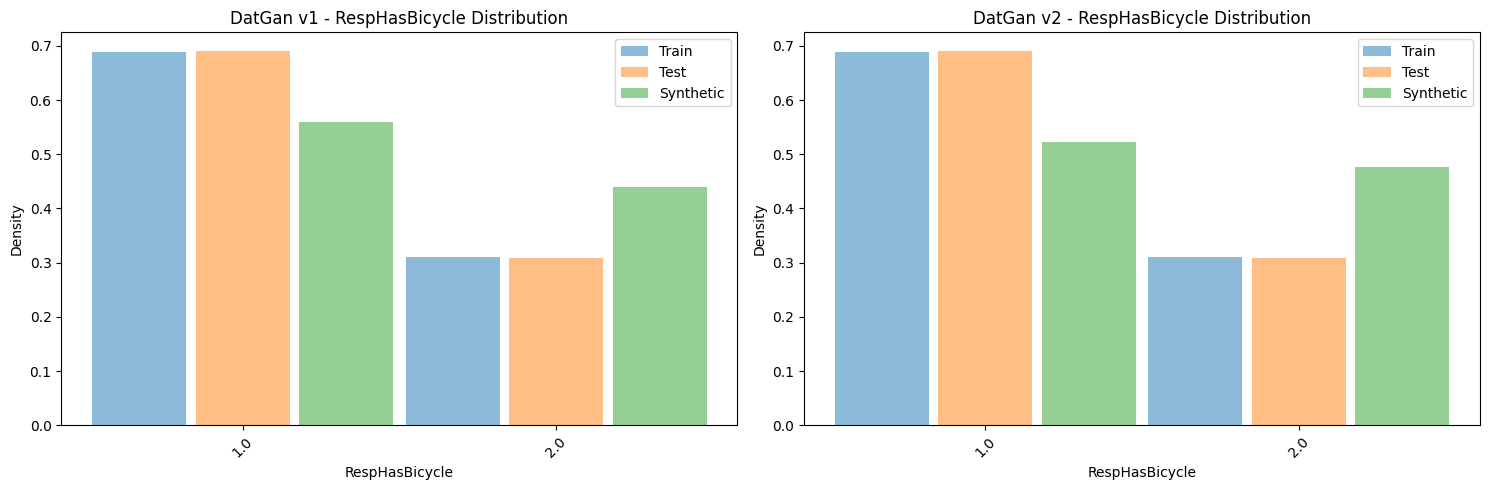

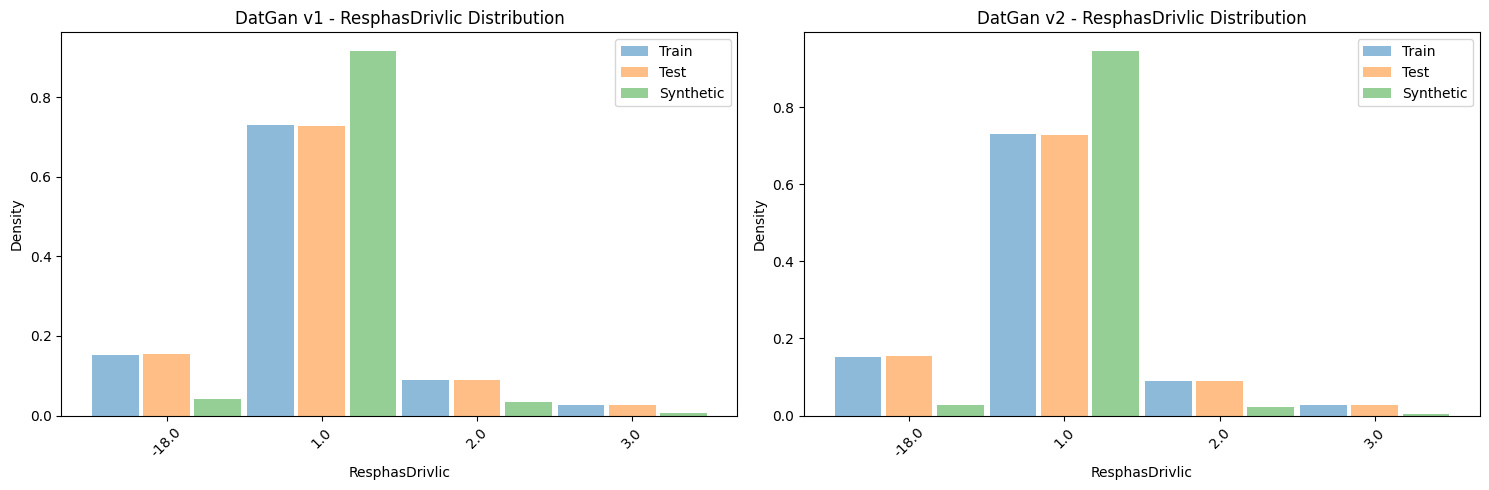

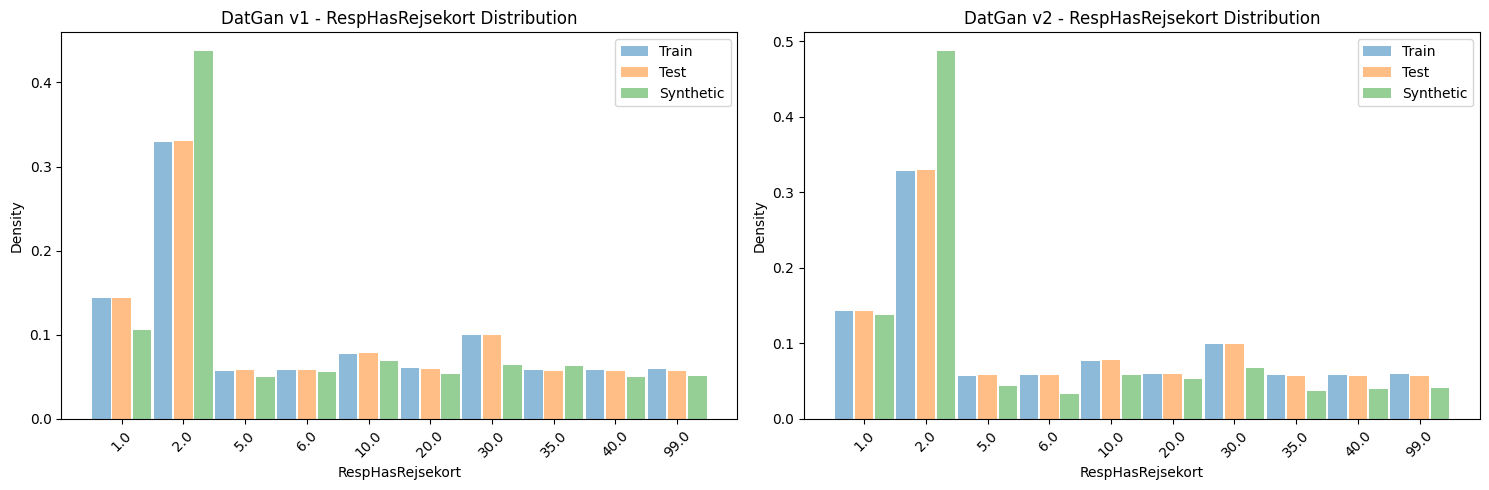

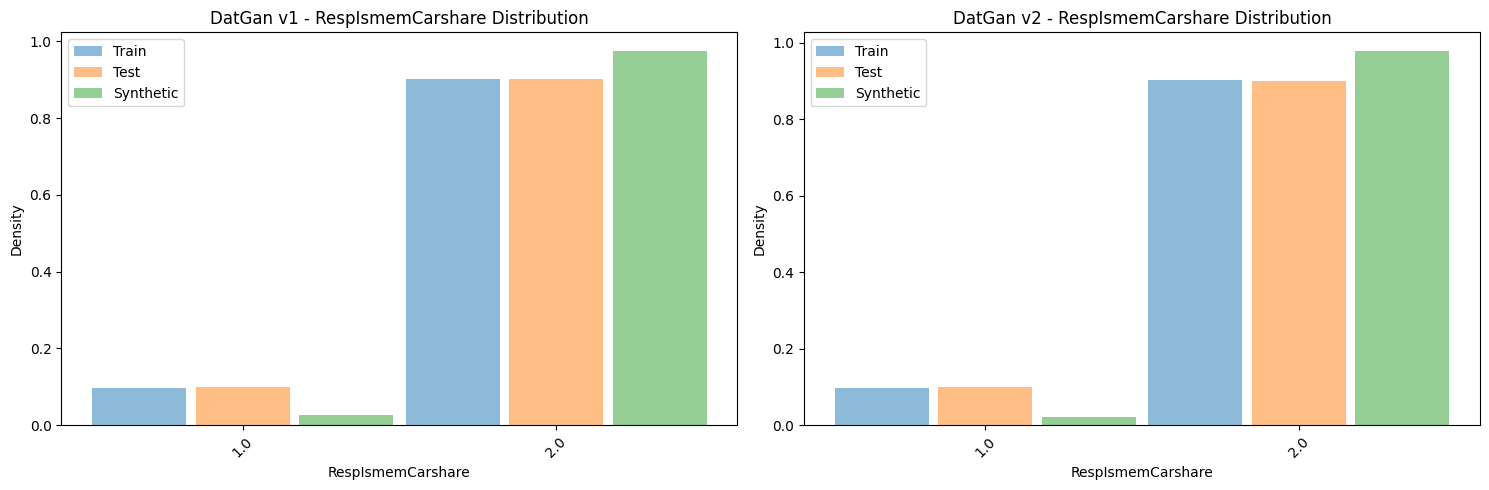

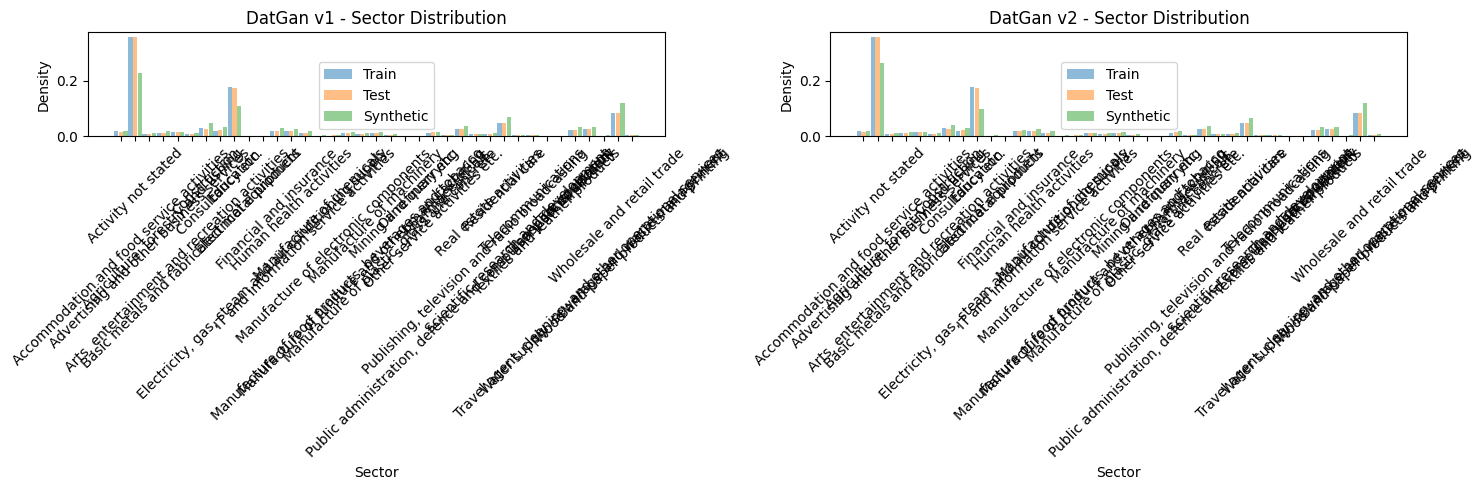

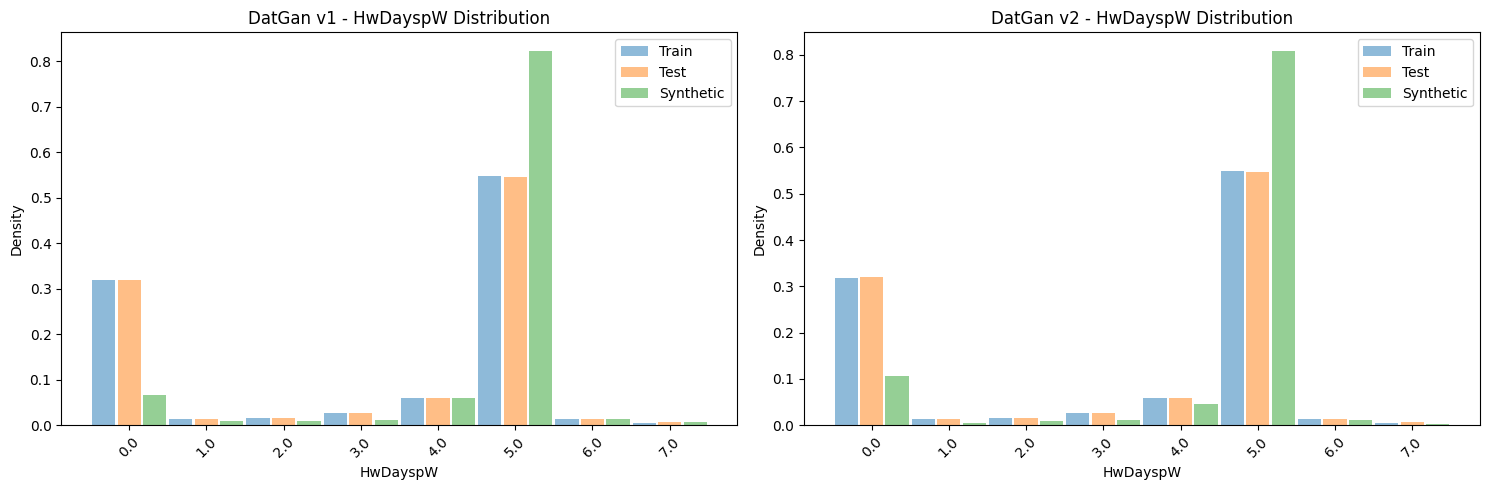

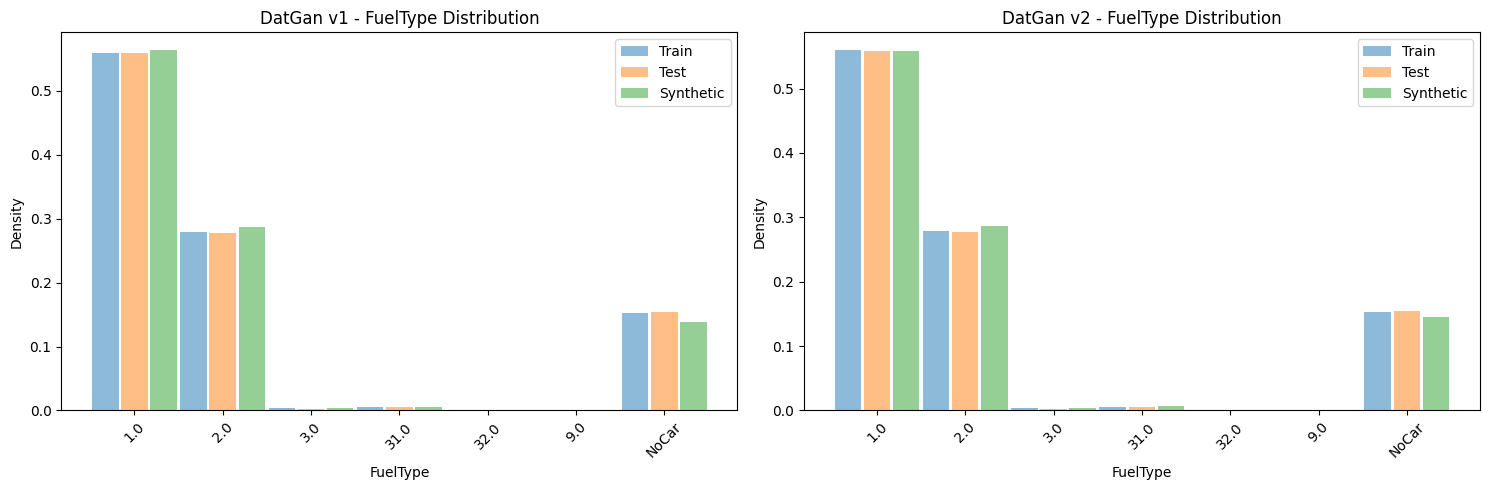

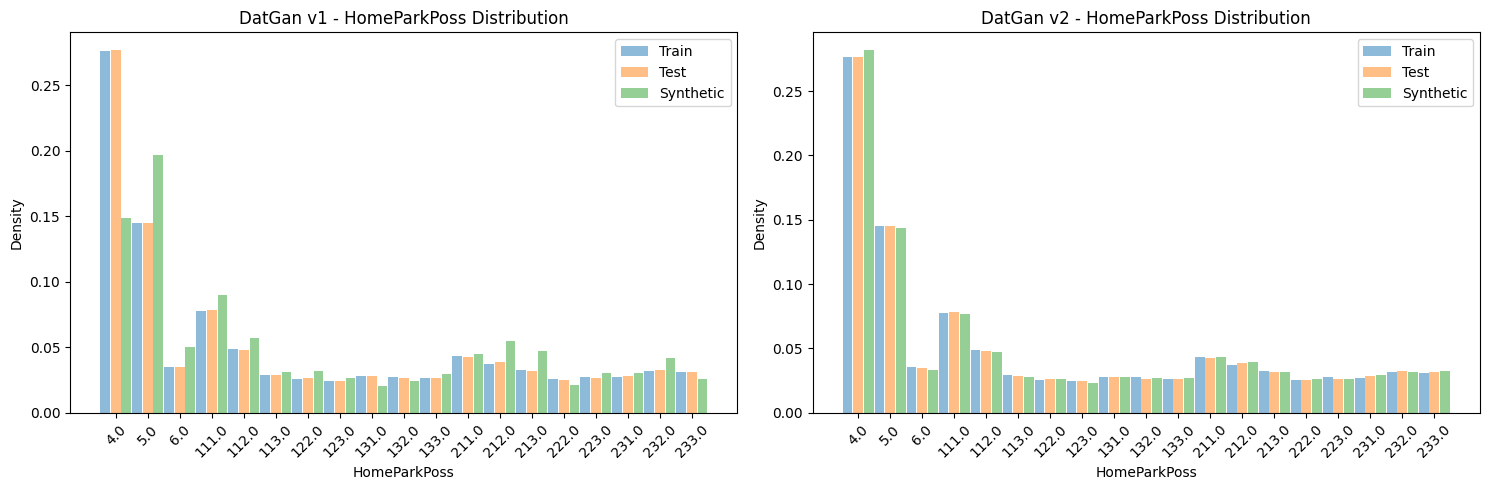

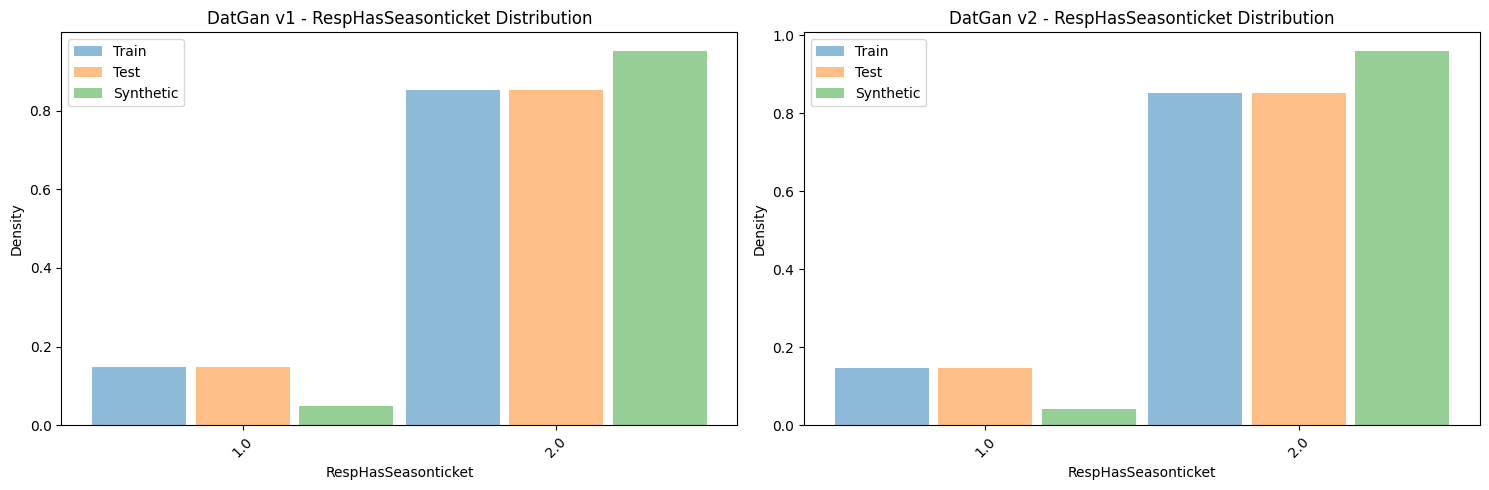

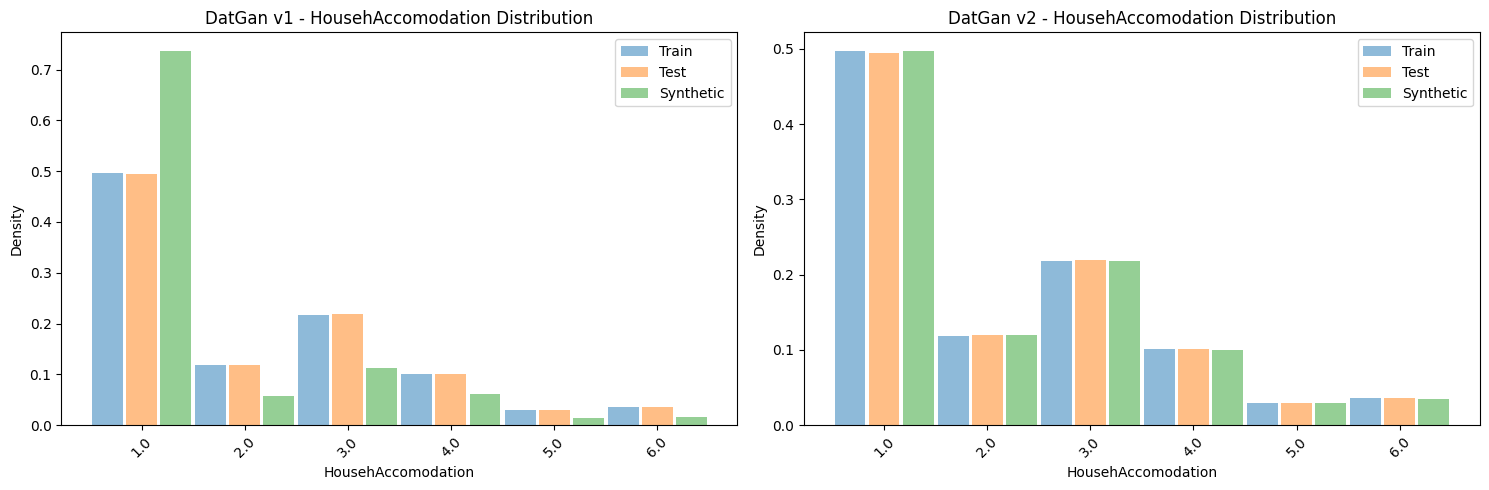

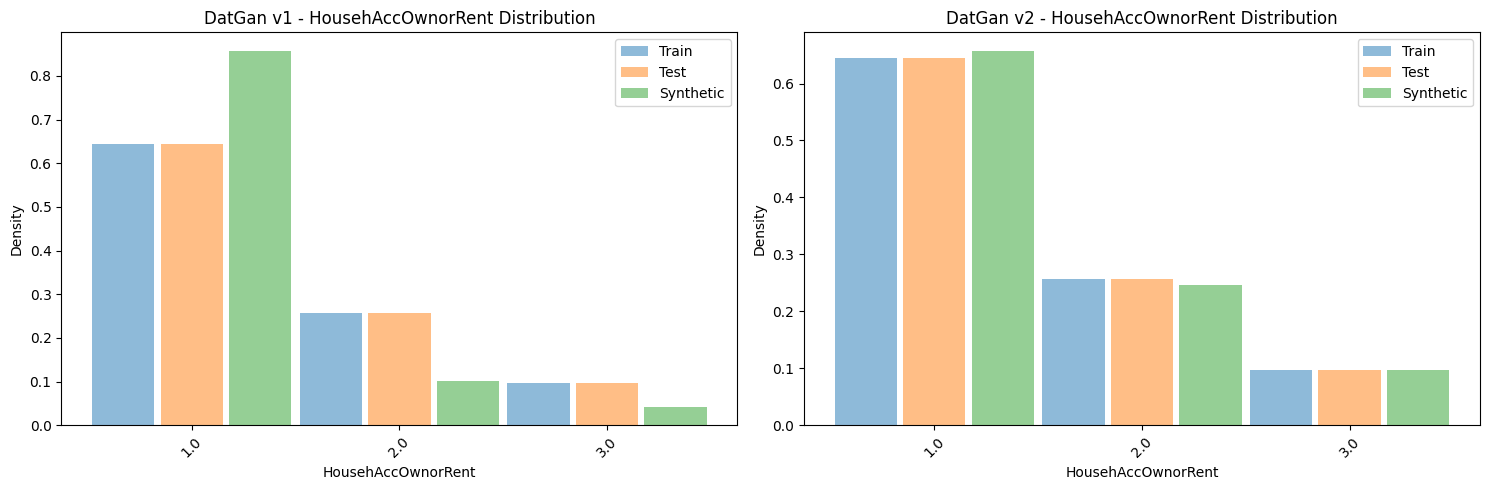

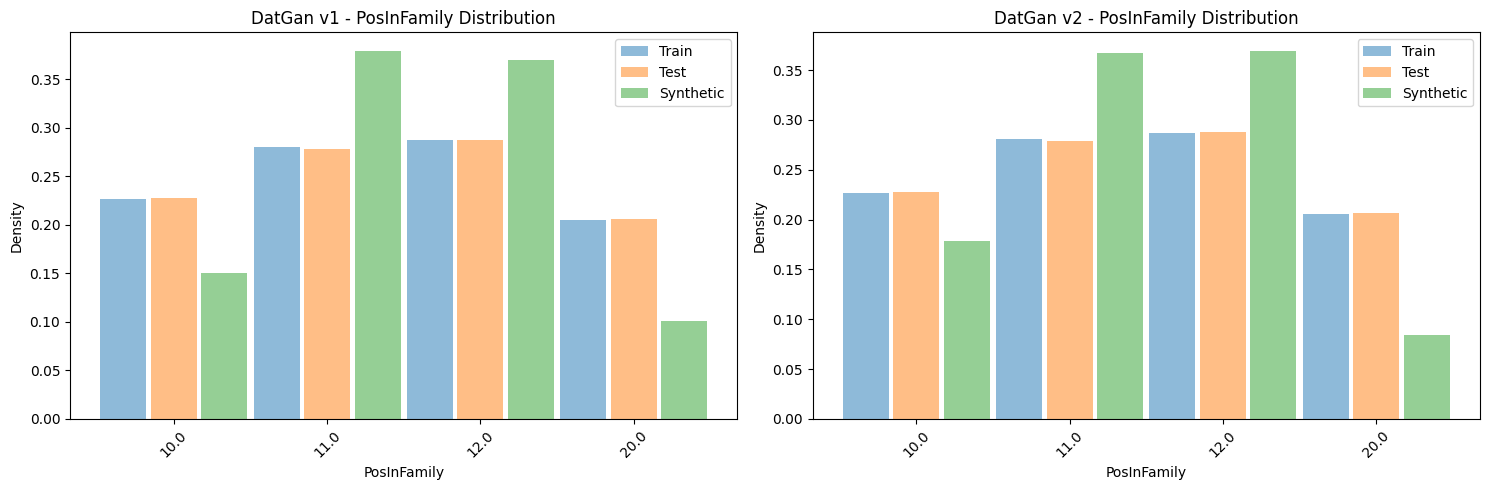

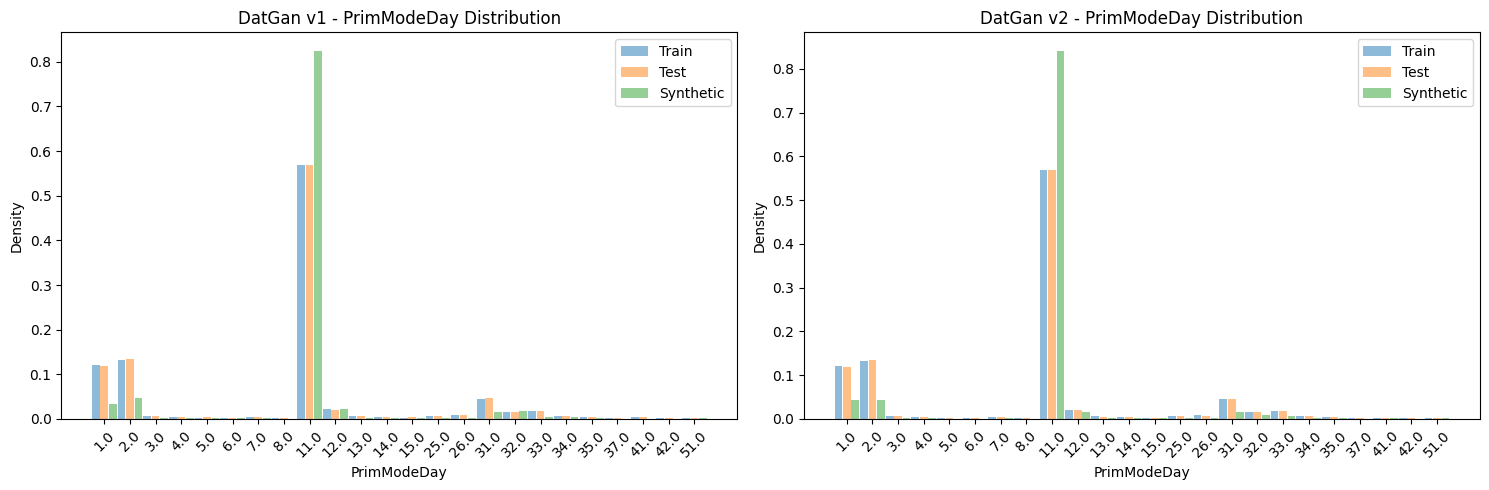

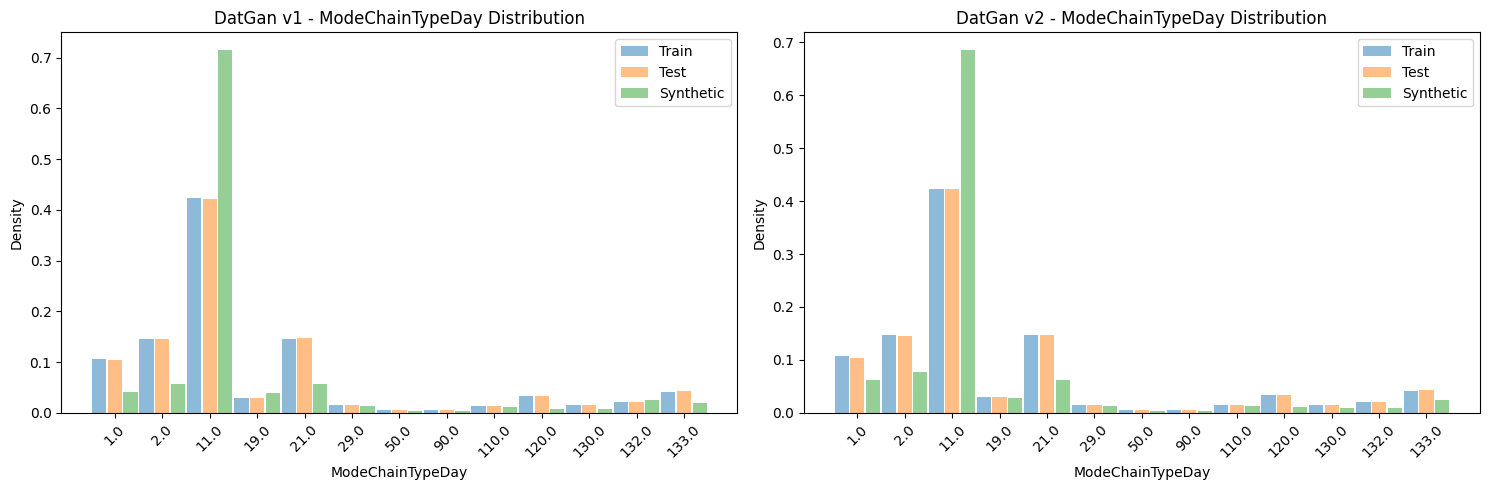

In [13]:
for i, column in enumerate(v1_train_set.columns):
    plot_comparison(v1_test_set, v1_train_set, v1_samples, v2_test_set,
                    v2_train_set, v2_samples, column, Density=True)



In [ ]:
from Utils import validationGAN as valGan

In [ ]:
valGan.validate_Gan_Cat(sampled=samples,real=test_set,train=train_set)